# Week 6 Exercises - Applications
Introduction to Numerical Problem Solving, Spring 2017   
Luong Nguyen, 7.3.2017   
Helsinki Metropolia University of Applied Sciences   

In [2]:
# Initial import statements
%matplotlib notebook
from matplotlib.pyplot import *
from numpy import *
from scipy.linalg import solve

### Exercise 1  
Four blocks of different masses $M_i$ are connected by ropes of negligble mass. Three of the blocks lie on a inclined plane, the coefficients of friction between the blocks and the plane being $\mu_i$. The equations of motion for the blocks can be shown to be:  

\begin{align*}
            T_1 + m_1a    &= m_1g(sin\ \theta - \mu_1cos\ \theta) \\
        -T_1 + T_2 + m_2a &= m_2g(sin\ \theta - \mu_2cos\ \theta) \\
        -T_2 + T_3 + m_3a &= m_3g(sin\ \theta - \mu_3cos\ \theta) \\
            -T_3 + m_4a   &= m_4g(sin\ \theta - \mu_4cos\ \theta)
\end{align*}

where $T_i$ denotes the tensile forces in the ropes and $a$ is the acceleration of the system.  
(a) Determine $a$ and $T_i$, when $\theta = 45^o$ and $g = 9.81\ m/s^2$, $m = [10.0,\ 4.0,\ 5.0,\ 6.0]\ kg$, and $\mu = [0.25,\ 0.30,\ 0.20]$.  
(b) What the angle should be in order that the system is in balance? Try a couple of different values for angle and find out what are the values for $a$ and $T_i$. Based on these values make a graph (x-axis = angle = $\theta$, y-axis = acceleration = $a$) and based on the graph estimate the angle giving the acceleration $a = 0.0\ m/s^2$.

### Solution
(a) First, we translate the equations into matrix form. I think the 4th equation should be $-T_3 + m_4a   = -m_4g$.
  
$
\begin{bmatrix}
    1 & 0 & 0 & m_1 \\
    -1 & 1 & 0 & m_2 \\
    0 & -1 & 1 & m_3 \\
    0 & 0 & -1 & m_4
 \end{bmatrix} 
 \enspace  
 \begin{bmatrix}
    T_1 \\
    T_2 \\
    T_3 \\
    a
 \end{bmatrix} 
 =
 \begin{bmatrix}
    m_1g(sin\ \theta - \mu_1cos\ \theta) \\
    m_2g(sin\ \theta - \mu_2cos\ \theta) \\
    m_3g(sin\ \theta - \mu_3cos\ \theta) \\
    -m_4g
 \end{bmatrix}
\tag*{}
 $

With given values of $m_i,\ g,\ \theta,\ \mu$, we can plug them in the matrix and use the imported solve function to find $T_i$ and $a$.

In [30]:
theta = radians(45) # convert from degree to radian
g = 9.81
m = [10.0, 4.0, 5.0, 6.0]
mu = [0.25, 0.3, 0.2]
A = array([[1.0, 0, 0, m[0]],
           [-1, 1, 0, m[1]],
           [0, -1, 1, m[2]],
           [0, 0, -1, m[3]]])
b = array([m[0]*g*(sin(theta) - mu[0]*cos(theta)),
           m[1]*g*(sin(theta) - mu[1]*cos(theta)),
           m[2]*g*(sin(theta) - mu[2]*cos(theta)),
          -m[3]*g])
        
x = solve(A, b)
for i in range(3):
    print("T_{} = {}".format(str(i+1),str(x[i])))
print("a = " + str(x[3]))

T_1 = 35.8913571917
T_2 = 48.8605565637
T_3 = 68.5404145404
a = 1.61340242341


(b) First we will define a function which takes in the angle $\theta$ in degrees and returns the acceleration $a$. This function would make the process of trying different values of angle $\theta$ more handy. After, we could use it to generate an array of acceleration values from an array of angles, so that we can plot these 2 arrays. From the plot, we could see the value of $\theta$ that makes $a = 0.0\ m/s^2$ is around $\theta = 32^o$.

<IPython.core.display.Javascript object>


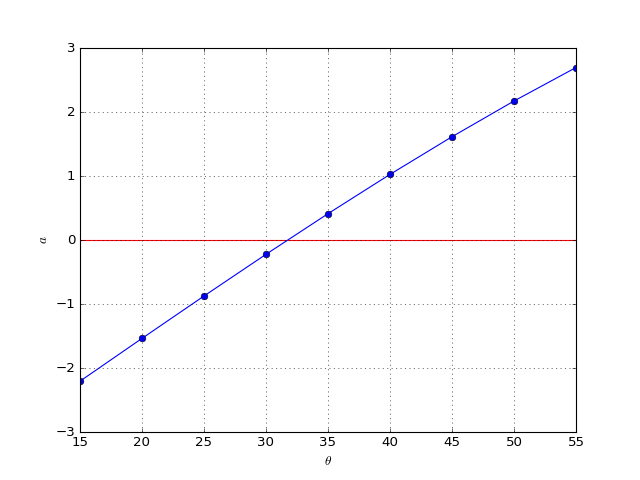

In [57]:
def fromThetaToA(theta):
    theta = radians(theta)
    b = array([m[0]*g*(sin(theta) - mu[0]*cos(theta)),
           m[1]*g*(sin(theta) - mu[1]*cos(theta)),
           m[2]*g*(sin(theta) - mu[2]*cos(theta)),
          -m[3]*g])
    x = solve(A, b)
    return x[3]

thetas = arange(15, 60, 5)
a = [fromThetaToA(theta) for theta in thetas]

figure('Problem 1b')
axhline(y = 0, color = 'r')
xlabel(r"${\theta}$")
ylabel("$a$")
plot(thetas, a, '-bo') 
grid()
show()